In [1]:
import cv2
import glob
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr



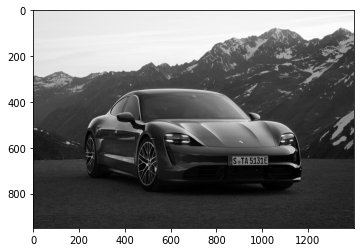

In [2]:
minArea = 500

img = cv2.imread('..\images/car2.jpg')
plateCascade = cv2.CascadeClassifier(r"C:\Users\Dell\Desktop\mini project\anpr\haarcascade_russian_plate_number.xml")
# img = [cv2.imread(file) for file in glob.glob("C:\Users\Dell\Desktop\mini project\mini_project-20210705T145712Z-001\mini_project\1.jpg")]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
numberPlates = plateCascade.detectMultiScale(gray, 1.1, 4)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
states = {"AN":"Andaman and Nicobar","AP":"Andhra Pradesh","AR":"Arunachal Pradesh","AS":"Assam","BR":"Bihar","CH":"Chandigarh","CG":"Chhattisgarh","DD":"Dadra and Nagar Haveli","DL":"Delhi","GA":"Goa","GJ":"Gujarat","HR":"Haryana","HP":"Himachal Pradesh","JK":"Jammu and Kashmir","JH":"Jharkhand","KA":"Karnataka","KL":"Kerala","LA":"Ladakh","LD":"Lakshadweep","MP":"Madhya Pradesh","MH":"Maharashtra","MN":"Manipur","ML":"Meghalaya","MZ":"Mizoram","NL":"Nagaland","OD":"Odisha","PY":"Puducherry","PB":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"Tamil Nadu","TS":"Telangana","TR":"Tripura","UP":"Uttar Pradesh","UK":"Uttarakhand","WB":"West Bengal"}

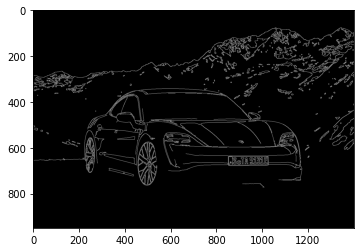

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


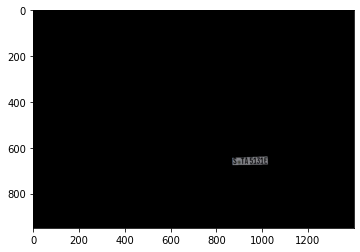

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx) == 4:
        location = approx
        break

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


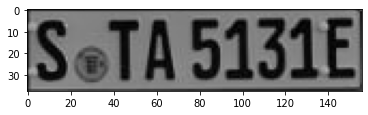

In [5]:
# (x,y) = np.where(mask==255)
# (x1, y1) = (np.min(x), np.min(y))
# (x2, y2) = (np.max(x), np.max(y))
# cropped_image = gray[x1:x2+1, y1:y2+1]

# plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [6]:
# states = {"AN":"Andaman and Nicobar","AP":"Andhra Pradesh","AR":"Arunachal Pradesh","AS":"Assam","BR":"Bihar","CH":"Chandigarh","CG":"Chhattisgarh","DD":"Dadra and Nagar Haveli","DL":"Delhi","GA":"Goa","GJ":"Gujarat","HR":"Haryana","HP":"Himachal Pradesh","JK":"Jammu and Kashmir","JH":"Jharkhand","KA":"Karnataka","KL":"Kerala","LA":"Ladakh","LD":"Lakshadweep","MP":"Madhya Pradesh","MH":"Maharashtra","MN":"Manipur","ML":"Meghalaya","MZ":"Mizoram","NL":"Nagaland","OD":"Odisha","PY":"Puducherry","PB":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"Tamil Nadu","TS":"Telangana","TR":"Tripura","UP":"Uttar Pradesh","UK":"Uttarakhand","WB":"West Bengal"}
# reader = easyocr.Reader(['en'])
# result = reader.readtext(cropped_image)
# text = result[0][-2]
# text = ''.join(e for e in text)
# print(text)
# stat = text[0:2]
# try:
#     print('Car Belongs to', states[stat])
# except:
#     print('State Not Recognised')
def remove(string):
    return string.replace(" ", "")

def remove_dot(string):
    return string.replace(".", "")
print(easyocr.__version__)
reader = easyocr.Reader(['en'])
# print(dir(cv2))
result = reader.readtext(cropped_image)
text = result[0][-2]
# text = ''.join(e for e in text)
print(remove_dot(remove(text)))
stat = text[0:2]
try:
    print('Car Belongs to', states[stat])
except:
    print('State Not Recognised')



1.3.2


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SoTA5131E7
State Not Recognised


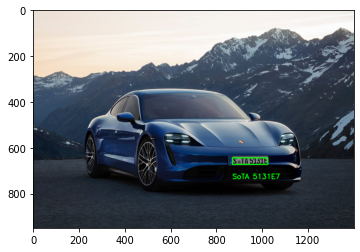

In [8]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))